In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
df = pd.read_excel('/content/Karachi.xlsx')

#1. **Data source:** 
We were able to get Karachi's weather data of the year 2022 from Pakistan Meteorological Department for research and educational purposes.

# **Data Description:**


1.   Wind_direction: Measured in degrees
2.   Wind_speed: Measured in (km/h)
3.   Air Pressure: Measured in hPa
4.   Humidity: Measured in percentage (converted from g.m-^3, which is units of grams of water vapour per cubic metre of air)
5.   Clouds: Measured in oktas (from 0-8, with 0 meaning sky is clear, and 8 meaning sky is completey covered.
6.   Rainfall: Measured in milimeters (mm)







# **2. Data Pre-processing**

In [ ]:
df.head()

,Date,Min_temp,Max_temp,Wind_speed,Wind_direction,Rainfall,Air Pressure,Humidity,Clouds
0,2022-01-01,12.9,23.8,4,23,0,1021.2,57,2
1,2022-01-02,13.5,25.4,6,23,0,1019.5,46,0
2,2022-01-03,16.0,25.5,6,23,0,1017.8,40,3
3,2022-01-04,17.0,25.5,4,45,0,1016.9,49,7
4,2022-01-05,14.8,23.5,0,0,20.7,1015.5,95,8


In [ ]:
df.tail()

,Date,Min_temp,Max_temp,Wind_speed,Wind_direction,Rainfall,Air Pressure,Humidity,Clouds
360,2022-12-27,12.5,26.5,2,45,0,1020.4,67,0
361,2022-12-28,13.0,27.0,4,68,0,1018.5,53,5
362,2022-12-29,14.5,27.1,0,0,0,1017.3,86,5
363,2022-12-30,16.0,29.5,2,68,0,1020.1,51,0
364,2022-12-31,11.5,27.2,2,23,0,1023.8,59,0


**2.1:** Converting our date column to pandas datetime, because it is easier to use.

In [39]:
# convert the 'Date' column to a datetime data type
df['Date'] = pd.to_datetime(df['Date'])

In [27]:
#some rainfall data has "trace", changing to numeric values
df["Rainfall"] = pd.to_numeric(df["Rainfall"], errors='coerce')

In [ ]:
df.columns

Index(['Date', 'Min_temp', 'Max_temp', 'Wind_speed', 'Wind_direction',
       'Rainfall', 'Air Pressure', 'Humidity', 'Clouds'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            365 non-null    datetime64[ns]
 1   Min_temp        365 non-null    float64       
 2   Max_temp        365 non-null    float64       
 3   Wind_speed      365 non-null    int64         
 4   Wind_direction  365 non-null    int64         
 5   Rainfall        348 non-null    float64       
 6   Air Pressure    365 non-null    float64       
 7   Humidity        365 non-null    int64         
 8   Clouds          365 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 25.8 KB


In [ ]:
df.isna().sum()

Date               0
Min_temp           0
Max_temp           0
Wind_speed         0
Wind_direction     0
Rainfall          17
Air Pressure       0
Humidity           0
Clouds             0
dtype: int64

**2.2:** displaying frequency and unique values for each column in our dataset

In [ ]:
for column in df.columns:
    print("Unique values for column '{}':".format(column))
    print(df[column].unique())
    print("\nValue counts for column '{}':".format(column))
    print(df[column].value_counts())
    print("\n")

Unique values for column 'Date':
['2022-01-01T00:00:00.000000000' '2022-01-02T00:00:00.000000000'
 '2022-01-03T00:00:00.000000000' '2022-01-04T00:00:00.000000000'
 '2022-01-05T00:00:00.000000000' '2022-01-06T00:00:00.000000000'
 '2022-01-07T00:00:00.000000000' '2022-01-08T00:00:00.000000000'
 '2022-01-09T00:00:00.000000000' '2022-01-10T00:00:00.000000000'
 '2022-01-11T00:00:00.000000000' '2022-01-12T00:00:00.000000000'
 '2022-01-13T00:00:00.000000000' '2022-01-14T00:00:00.000000000'
 '2022-01-15T00:00:00.000000000' '2022-01-16T00:00:00.000000000'
 '2022-01-17T00:00:00.000000000' '2022-01-18T00:00:00.000000000'
 '2022-01-19T00:00:00.000000000' '2022-01-20T00:00:00.000000000'
 '2022-01-21T00:00:00.000000000' '2022-01-22T00:00:00.000000000'
 '2022-01-23T00:00:00.000000000' '2022-01-24T00:00:00.000000000'
 '2022-01-25T00:00:00.000000000' '2022-01-26T00:00:00.000000000'
 '2022-01-27T00:00:00.000000000' '2022-01-28T00:00:00.000000000'
 '2022-01-29T00:00:00.000000000' '2022-01-30T00:00:00.000

# **3. Feature Engineering**

**3.1:** Dewpoint calculation 


*   Dewpoint is caclulated by the Magnus Formula, which takes into account the temperature, humidity and air pressure.
*   We have created a function, which calculates dewpoint based on these parameters, and created a new column as Dew_point in our dataset
*   We also only had min and max temperatures, so we calculated the average temperature for each day and used it for dewpoint calculation.



Formula for dewpoint is as follows:
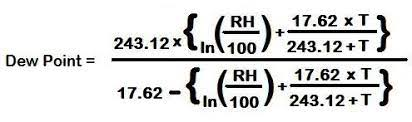



In [73]:
from numpy import log, e

def calculate_dewpoint(temperature, humidity):
    dewpoint = (243.12 * ((log((humidity/100) * (6.112 * (e ** ((17.62 * temperature) / (243.04 + temperature)))))))) / (17.62 - log((humidity/100) * (6.112 * (e ** ((17.62 * temperature) / (243.04 + temperature))))))
    return dewpoint

#calculate average temperature because we have min and max 
df["Temperature"] = (df["Min_temp"] + df["Max_temp"])/2

#calculate dewpoint
df["Dew_point"] = calculate_dewpoint(df["Temperature"], df["Humidity"])

In [41]:
df.head()

,Date,Min_temp,Max_temp,Wind_speed,Wind_direction,Rainfall,Air Pressure,Humidity,Clouds,Temperature,Dew_point
0,2022-01-01,12.9,23.8,4,23,0,1021.2,57,2,18.35,39.919259
1,2022-01-02,13.5,25.4,6,23,0,1019.5,46,0,19.45,37.219492
2,2022-01-03,16.0,25.5,6,23,0,1017.8,40,3,20.75,36.134650
3,2022-01-04,17.0,25.5,4,45,0,1016.9,49,7,21.25,40.453937
4,2022-01-05,14.8,23.5,0,0,20.7,1015.5,95,8,19.15,50.810661


**3.2:** Conditions classification


*   We are going to classify each day in our dataset into 5 different weather conditions.
*   The weather conditions include **"Sunny", "Windy", "Rainy", "Cloudy" and "Stormy".**
*   We are classifying our days based on the values of "Rainfall", "Wind_speed", "Clouds" and "Air Pressure".



In [74]:
# Create a new column 'Conditions'
df['Conditions'] = ''

# Classify each day as one of the conditions
for i in range(len(df)):
    if (df['Rainfall'][i] > 0):
        df.at[i, 'Conditions'] = 'Rainy'
    elif (df['Wind_speed'][i] > 15):
        df.at[i, 'Conditions'] = 'Windy'
    elif (df['Clouds'][i] > 6):
        df.at[i, 'Conditions'] = 'Cloudy'
    elif (df['Air Pressure'][i] < 1000):
        df.at[i, 'Conditions'] = 'Stormy'
    else:
        df.at[i, 'Conditions'] = 'Sunny'

In [11]:
df.head()

,Date,Min_temp,Max_temp,Wind_speed,Wind_direction,Rainfall,Air Pressure,Humidity,Clouds,Temperature,Dew_point,Conditions
0,2022-01-01,12.9,23.8,4,23,0.0,1021.2,57,2,18.35,39.919259,Sunny
1,2022-01-02,13.5,25.4,6,23,0.0,1019.5,46,0,19.45,37.219492,Sunny
2,2022-01-03,16.0,25.5,6,23,0.0,1017.8,40,3,20.75,36.134650,Sunny
3,2022-01-04,17.0,25.5,4,45,0.0,1016.9,49,7,21.25,40.453937,Cloudy
4,2022-01-05,14.8,23.5,0,0,20.7,1015.5,95,8,19.15,50.810661,Rainy


# **4. Data Visualization**

**4.1:** Weather conditions over count of days

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


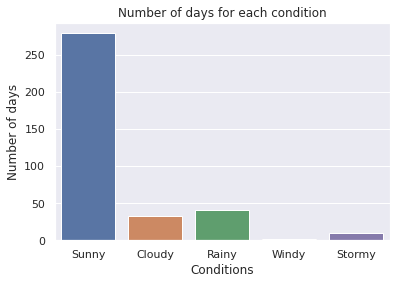

In [ ]:
import seaborn as sns

sns.countplot(df['Conditions'])
plt.xlabel("Conditions")
plt.ylabel("Number of days")
plt.title("Number of days for each condition")
plt.savefig("conditions.png", dpi = 300)
plt.show()

**Observation**: In the year 2022, majority of the days were sunny.

**4.2:** Dewpoint  over time

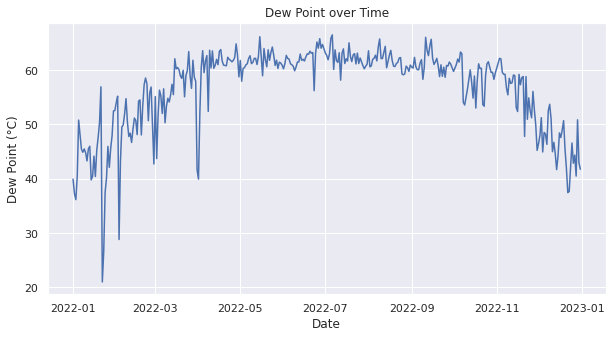

In [ ]:
#set date as the index
df.set_index("Date", inplace=True)

plt.figure(figsize=(10,5))
plt.plot(df["Dew_point"])
plt.xlabel("Date")
plt.ylabel("Dew Point (°C)")
plt.title("Dew Point over Time")
plt.savefig('dewpoint_over_time.png', dpi = 300)
plt.show()

**Observation**:
 

*    The sudden drop in dew point readings between January and March, and between March and May that we are observing in our graph could indicate a change in weather patterns during those periods. 
*   Dew point temperature is a measure of the amount of moisture in the air, so a drop in dew point temperature typically indicates that the air is becoming drier.



**4.3:** Min and Max temperatures during all 12 months of 2022

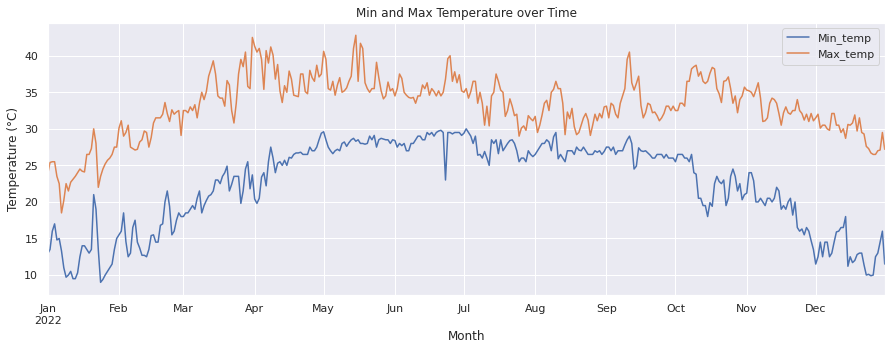

In [ ]:
# plot the time series of 'Min_temp' and 'Max_temp'
df[['Min_temp', 'Max_temp']].plot(figsize=(15,5))
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Min and Max Temperature over Time')
plt.savefig("min_max.png", dpi=300)
plt.show()

**Observation**: April and June were the warmest months of 2022

**4.4:** Average rainfall by each month

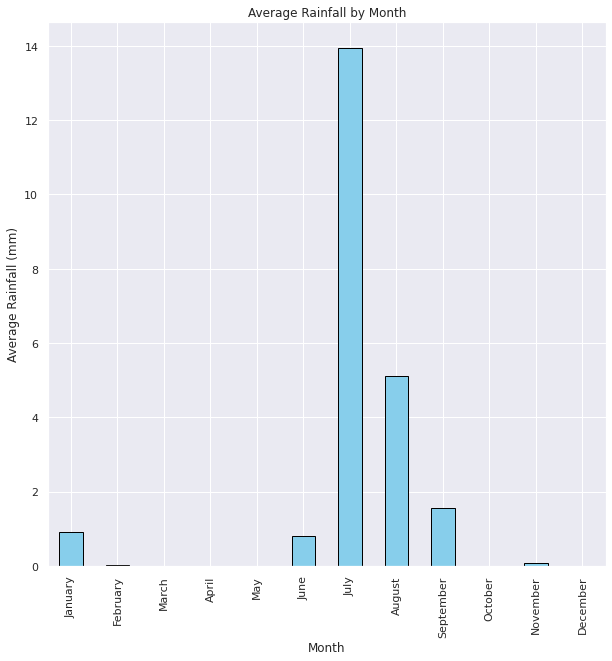

In [ ]:
import calendar #for getting month names

#reading in dataset again, with dates
df = pd.read_excel("/content/Karachi.xlsx", parse_dates=['Date'])

#some rainfall data has "trace", changing to numeric values
df["Rainfall"] = pd.to_numeric(df["Rainfall"], errors='coerce')


df_monthly = df.groupby(df['Date'].dt.month)['Rainfall'].mean()
df_monthly.index = [calendar.month_name[i] for i in df_monthly.index]

# plot the bar chart
plt.figure(figsize=(10,10))
df_monthly.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(range(0,12))
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.title('Average Rainfall by Month')
plt.savefig("avg_rainfall.png", dpi=300)
plt.show()

**Observation**: July had the most amount of rainfall in 2022.

**4.5:** Comparison of rainfall to windspeed

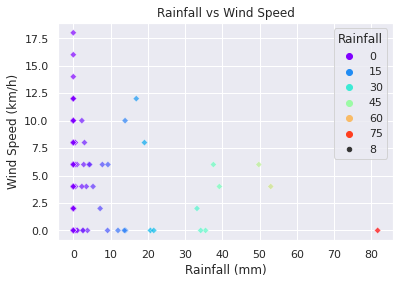

In [ ]:

sns.scatterplot(x="Rainfall", y="Wind_speed", data=df, 
                alpha=0.7, size=8, sizes=(20, 200), 
                hue="Rainfall", legend="brief",
                palette="rainbow", marker="D")
plt.xlabel('Rainfall (mm)')
plt.ylabel('Wind Speed (km/h)')
plt.title('Rainfall vs Wind Speed')
plt.savefig("scatterplot.png", dpi=300)

 **Observation**: As rainfall increases, wind decreases. Hence, we can say that wind speed is inversely proportional to rainfall

# **5. Building a Rainfall Prediction Model**

**5.1** Handling values before feeding them into our model

Some of our days have trace values. replacing all "trace" values in rainfall to 0 

In [70]:
df = pd.read_excel('/content/Karachi.xlsx')

In [71]:
# convert the 'Date' column to a datetime data type
df['Date'] = pd.to_datetime(df['Date'])

In [72]:
df['Rainfall'] = df['Rainfall'].replace('Trace', 0)

Label encoding our conditions column

In [80]:
from sklearn.preprocessing import LabelEncoder

# create an instance of the label encoder
le = LabelEncoder()

# fit and transform the 'Conditions' column
df['Conditions'] = le.fit_transform(df['Conditions'])


In [78]:
# Get the label encoding mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'Cloudy': 0, 'Rainy': 1, 'Stormy': 2, 'Sunny': 3, 'Windy': 4}


In [ ]:
df.head()

,Date,Min_temp,Max_temp,Wind_speed,Wind_direction,Rainfall,Air Pressure,Humidity,Clouds,temperature,Dew_point,Conditions
0,2022-01-01,12.9,23.8,4,23,0.0,1021.2,57,2,18.35,39.919259,3
1,2022-01-02,13.5,25.4,6,23,0.0,1019.5,46,0,19.45,37.219492,3
2,2022-01-03,16.0,25.5,6,23,0.0,1017.8,40,3,20.75,36.134650,3
3,2022-01-04,17.0,25.5,4,45,0.0,1016.9,49,7,21.25,40.453937,0
4,2022-01-05,14.8,23.5,0,0,20.7,1015.5,95,8,19.15,50.810661,1


**5.2** Training a LR model

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# define the predictor and target variables
X = df[['Min_temp', 'Max_temp', 'Wind_speed', 'Wind_direction', 'Air Pressure', 'Humidity', 'Clouds', 'Dew_point', 'Conditions']]
y = df['Rainfall']

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

# fit a linear regression model to the training data
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# make predictions on the test data
y_pred = lin_reg.predict(X_test)

# calculate the mean absolute error of the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: {:.2f}".format(mae))


Mean Absolute Error: 3.49


**5.3** Training a Random Forest Regressor model




In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# define the predictor and target variables
X = df[['Min_temp', 'Max_temp', 'Wind_speed', 'Wind_direction', 'Air Pressure', 'Humidity', 'Clouds', 'Dew_point', 'Conditions']]
y = df['Rainfall']


# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# fit a random forest regressor model to the training data
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)

# make predictions on the test data
y_pred = rf_reg.predict(X_test)

# calculate the mean absolute error of the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: {:.2f}".format(mae))

Mean Absolute Error: 1.11


**5.4** Training a Support Vector Regressor model




In [83]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# define the predictor and target variables
X = df[['Min_temp', 'Max_temp', 'Wind_speed', 'Wind_direction', 'Air Pressure', 'Humidity', 'Clouds', 'Dew_point', 'Conditions']]
y = df['Rainfall']

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit a SVM model to the training data
svm = SVR(kernel='poly', degree=2)
svm.fit(X_train, y_train)

# make predictions on the test data
y_pred = svm.predict(X_test)

# calculate the mean squared error of the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

Mean Absolute Error:  0.8346566766734576


# **ML Models Performance Evaluation**

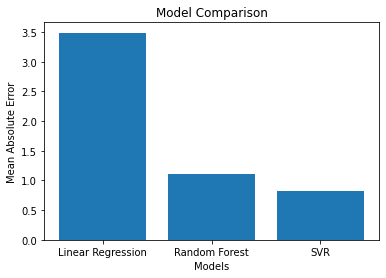

In [87]:
# Define the models and their corresponding errors
models = ['Linear Regression', 'Random Forest', 'SVR']
errors = [3.49, 1.11, 0.83]

plt.bar(models, errors)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Model Comparison')
plt.show()



*   The linear regression model has a mean absolute error of 3.36, which means each prediction is off by 3.36 units 
*   The random forest regressor model has a mean absolute error of 1.15, which is much better.
* The Support Vector Regressor has a mean absolute error of 0.83, which is our best performing model.




# **6. Predicting July 2023 Rainfall**


*   Now, using our random forest regressor model, we will predict the rainfall in July 2023.

> Rainfall depends on the following variables:
1.   'Min_temp' 
2.   'Max_temp'
3.   'Wind_speed'
4.   'Wind_direction'
5.   'Air Pressure' 
7.   'Humidity'
8.   'Clouds'
9.   'Dew_point'
10.  'Conditions'



*   By giving certain values, we can predict the amount of rainfall in the month of July 2023.



*   Label encoded values for the conditions are {'Cloudy': 0, 'Rainy': 1, 'Stormy': 2, 'Sunny': 3, 'Windy': 4}















In [85]:
#support vector regressor object
svm = SVR(kernel='poly', degree=2)


#fit the model with our previous data
svm.fit(X_train, y_train)

#create a new dataset for July 2023
july_2023 = pd.DataFrame({'Min_temp': [30], 'Max_temp': [40], 'Wind_speed': [15],
'Wind_direction': [270], 'Air Pressure': [1009], 'Humidity': [60],
'Clouds': [4], 'Dew_point': [15], 'Conditions': [1]})


#using the trained model to make predictions
july_2023_pred = rf_reg.predict(july_2023)

print("With these variables, the rainfall in july 2023 will be",july_2023_pred,"(mm)")

With these variables, the rainfall in july 2023 will be [7.529] (mm)


In [86]:
df.head()

,Date,Min_temp,Max_temp,Wind_speed,Wind_direction,Rainfall,Air Pressure,Humidity,Clouds,Temperature,Dew_point,Conditions
0,2022-01-01,12.9,23.8,4,23,0.0,1021.2,57,2,18.35,39.919259,3
1,2022-01-02,13.5,25.4,6,23,0.0,1019.5,46,0,19.45,37.219492,3
2,2022-01-03,16.0,25.5,6,23,0.0,1017.8,40,3,20.75,36.134650,3
3,2022-01-04,17.0,25.5,4,45,0.0,1016.9,49,7,21.25,40.453937,0
4,2022-01-05,14.8,23.5,0,0,20.7,1015.5,95,8,19.15,50.810661,1


In [14]:
df.to_excel("Karachi_Cleaned_2022.xlsx")